In [60]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
img = cv2.imread('D:\\Face emotion recognition\\test3.jpg')
img.shape

(800, 1200, 3)

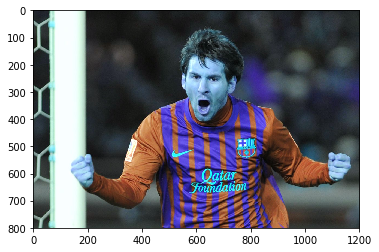

In [62]:
plt.imshow(img)

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

In [64]:
gray

array([[140, 140, 139, ...,  37,  35,  34],
       [ 36,  35,  33, ...,  42,  42,  42],
       [ 42,  40,  38, ...,  42,  43,  43],
       ...,
       [ 57,  58,  58, ...,  56,  57,  57],
       [ 57,  58,  59, ...,  55,  55,  56],
       [ 57,  58,  59, ...,  53,  54,  55]], dtype=uint8)

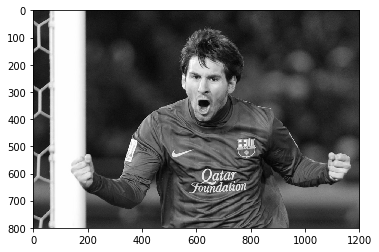

In [65]:
plt.imshow(gray, cmap='gray')

In [66]:
face_cascade = cv2.CascadeClassifier('D:\\Face emotion recognition\\emotion_detection-master\\haarcascade_frontalface_default.xml')


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[531, 174, 198, 198]], dtype=int32)

In [67]:
(x,y,w,h) = faces[0]
x,y,w,h

(531, 174, 198, 198)

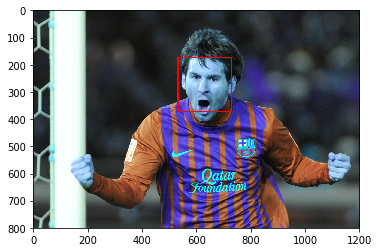

In [68]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

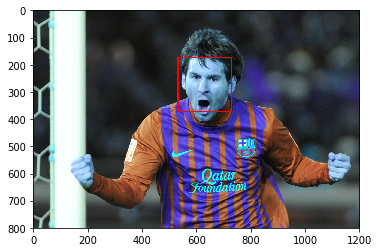

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
   
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

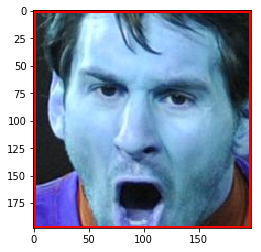

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(198, 198, 3)

# Wavelet features

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

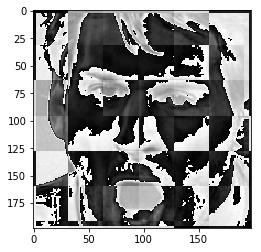

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')